This notebook is created by following the instruction and excercises on Codebasics NLP tutorial.  
Thanks to the channel for providing this important resource  

# 1. Regular expressions
A lot of natural langauge processing problems require you to use regular expression or are at least in part a regex problem. 
So it is important to understand its basics and familiarize yourself with it.

In [1]:
#Pattern matching with re
import re
#For phone number
chat = 'codebasics: here it is: (123)-567-8912, abc@xyz.com codebasics: yes, phone: 1235678912 email: abc@xyz.com'

#define the pattern you want to match
#two options: 1. 10 digit number; 2. 3 digits in brackets and then two hyphens between 3 digits and 4 digits
pattern = r"\d{10}|\(\d{3}\)-\d{3}-\d{3}"
#find all occurences of it
matches = re.findall(pattern, chat)
print("Phone numbers are:",matches)

Phone numbers are: ['(123)-567-891', '1235678912']


In [2]:
#For email ids
#define pattern you want to match
#any number of digits and alphabets(capital or small) or an underscore before the @ sign 
#and any number of alphabets ended with .com
pattern = r"[a-zA-Z0-9_]*@[a-zA-Z]*\.com"
#find the pattern
matches = re.findall(pattern, chat)
print("Email ids are:",matches)

Email ids are: ['abc@xyz.com', 'abc@xyz.com']


In [3]:
chat = 'codebasics: Hello, I am having an issue with my order # 412889912 codebasics: I have a problem with my order number 412889912codebasics: My order 412889912 is having an issue, I was charged 300$ when online it says 280$'
#For order number
#start with order, then look for anything that's not a digit, then acess the digits
#use () to access part of the pattern
pattern = r"order[^\d]*(\d*)"
matches = re.findall(pattern, chat)
print("Order numbers are:",matches)

Order numbers are: ['412889912', '412889912', '412889912']


In [4]:
#Retrive information
text='''
Born	Elon Reeve Musk
June 28, 1971 (age 50)
Pretoria, Transvaal, South Africa
Citizenship	
South Africa (1971–present)
Canada (1971–present)
United States (2002–present)
Education	University of Pennsylvania (BS, BA)
Title	
Founder, CEO and Chief Engineer of SpaceX
CEO and product architect of Tesla, Inc.
Founder of The Boring Company and X.com (now part of PayPal)
Co-founder of Neuralink, OpenAI, and Zip2
Spouse(s)	
Justine Wilson
​
​(m. 2000; div. 2008)​
Talulah Riley
​
​(m. 2010; div. 2012)​
​
​(m. 2013; div. 2016)
'''
#find pattern
def get_pattern_match(pattern, text):
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]

#match pattern for differnt information
def extract_personal_information(text):
    age = get_pattern_match('age (\d+)', text)
    full_name = get_pattern_match('Born(.*)\n', text)
    birth_date = get_pattern_match('Born.*\n(.*)\(age', text)
    birth_place = get_pattern_match('\(age.*\n(.*)', text)
    return {
        'age': int(age),
        'name': full_name.strip(),
        'birth_date': birth_date.strip(),
        'birth_place': birth_place.strip()
    }
    
extract_personal_information(text)

{'age': 50,
 'name': 'Elon Reeve Musk',
 'birth_date': 'June 28, 1971',
 'birth_place': 'Pretoria, Transvaal, South Africa'}

In [5]:
#Homework1
text = '''Follow our leader Elon musk on twitter here: https://twitter.com/elonmusk, more information 
on Tesla's products can be found at https://www.tesla.com/. Also here are leading influencers 
for tesla related news,
https://twitter.com/teslarati
https://twitter.com/dummy_tesla
https://twitter.com/dummy_2_tesla'''
pattern = r"https:\/\/twitter\.com\/([a-zA-Z0-9_]*)"
matches = re.findall(pattern, text)
print("Twitter handles are:",matches)

#Homework 2
text = '''
Concentration of Risk: Credit Risk
Financial instruments that potentially subject us to a concentration of credit risk consist of cash, cash equivalents, marketable securities,
restricted cash, accounts receivable, convertible note hedges, and interest rate swaps. Our cash balances are primarily invested in money market funds
or on deposit at high credit quality financial institutions in the U.S. These deposits are typically in excess of insured limits. As of September 30, 2021
and December 31, 2020, no entity represented 10% or more of our total accounts receivable balance. The risk of concentration for our convertible note
hedges and interest rate swaps is mitigated by transacting with several highly-rated multinational banks.
Concentration of Risk: Supply Risk
We are dependent on our suppliers, including single source suppliers, and the inability of these suppliers to deliver necessary components of our
products in a timely manner at prices, quality levels and volumes acceptable to us, or our inability to efficiently manage these components from these
suppliers, could have a material adverse effect on our business, prospects, financial condition and operating results.
'''
pattern = r"Concentration of Risk: ([a-zA-Z ]*)"
matches = re.findall(pattern, text)
print("Risks are:",matches)

#Homework 3 
text = '''Tesla's gross cost of operating lease vehicles in FY2021 Q1 was $4.85 billion.
BMW's gross cost of operating vehicles in FY2021 S1 was $8 billion.'''
pattern = r"\$[\d\.]* [a-zA-Z]*"
matches = re.findall(pattern, text)
print("Costs are:",matches)

Twitter handles are: ['elonmusk', 'teslarati', 'dummy_tesla', 'dummy_2_tesla']
Risks are: ['Credit Risk', 'Supply Risk']
Costs are: ['$4.85 billion', '$8 billion']


# 2. Difference between libraries: spacy and nltk
1. spacy is object oriented
 - doc is an object and sents is it property and we are accessing them through object oriented programming
 - provides most efficient nlp algorithms for a given tasks
2. nltk is mainly a string processing library; 
 - offers so many algorithms for specific customizations

In [6]:
#Sentence and word tokenization is spacy
import spacy
nlp = spacy.load("en_core_web_sm")
#Define a document
doc = nlp("Dr. Strange loves pav bhaji of Mumbai. Hulk loves chaat puri of New Delhi.")
#Splitting para into sentencs: Sentence tokenization using spacy
print("Sentence Tokenization:")
for sentence in doc.sents:
    print(sentence)
#work tokenization
print("\nWord Tokenization:")
for sentence in doc.sents:
    for word in sentence:
        print(word)

2023-02-10 02:36:14.840596: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-10 02:36:14.978432: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-10 02:36:14.978451: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-10 02:36:15.008659: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-10 02:36:15.626948: W tensorflow/stream_executor/platform/de

Sentence Tokenization:
Dr. Strange loves pav bhaji of Mumbai.
Hulk loves chaat puri of New Delhi.

Word Tokenization:
Dr.
Strange
loves
pav
bhaji
of
Mumbai
.
Hulk
loves
chaat
puri
of
New
Delhi
.


In [7]:
#Tokentization in nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/himanshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
from nltk.tokenize import sent_tokenize
sent_tokenize("Dr. Strange loves pav bhaji of Mumbai. Hulk loves chaat puri of New Delhi.")

['Dr.',
 'Strange loves pav bhaji of Mumbai.',
 'Hulk loves chaat puri of New Delhi.']

In [9]:
from nltk.tokenize import word_tokenize
word_tokenize("Dr. Strange loves pav bhaji of Mumbai. Hulk loves chaat puri of New Delhi.")

['Dr',
 '.',
 'Strange',
 'loves',
 'pav',
 'bhaji',
 'of',
 'Mumbai',
 '.',
 'Hulk',
 'loves',
 'chaat',
 'puri',
 'of',
 'New',
 'Delhi',
 '.']

# 3. Tokenization in spacy
- It is not as simply as splitting strings at full stop or space but you need laguage specific rules.
- We use a blank pipeline here.

In [10]:
import spacy
#create blank english language object/compoenent; 
#create blank component for basics, later we will learn pretrained pipelines
nlp = spacy.blank("en")
#the next variables contains the text you are studying 
doc = nlp("Dan gave two $ to his friend's niece to buy her fiend's car.")
#this doc object has already tokenized words in the text we provided
print("Tokens:")
for token in doc:
    print(token)
print("\ntype(nlp):",type(nlp))
print("type(doc):",type(doc))
print("type(token):",type(token))
#let's understand how this library is smart!
token0 = doc[0]
print("token0:",token0)
print("token0.is_alpha:",token0.is_alpha)
token2 = doc[2]
print("token2:",token2)
print("type(token2):",type(token2))
#it undestood that this text represents a number!
print("token2.like_num:",token2.like_num)

Tokens:
Dan
gave
two
$
to
his
friend
's
niece
to
buy
her
fiend
's
car
.

type(nlp): <class 'spacy.lang.en.English'>
type(doc): <class 'spacy.tokens.doc.Doc'>
type(token): <class 'spacy.tokens.token.Token'>
token0: Dan
token0.is_alpha: True
token2: two
type(token2): <class 'spacy.tokens.token.Token'>
token2.like_num: True


### Apply spacy to extract information from a file

In [11]:
with open("students.txt") as file:
    text = file.readlines()
print("Text in the file:", text)
#convert the list of elements to a single string
text = ' '.join(text)
print("After converting to one string:",text)
#now use this text to create an object of spacy
doc = nlp(text)
#then acces token to extract email info
for token in doc:
    if token.like_email:
        print("Email is:",token)
#There are several such attributes available
#then acces token to extract number
for token in doc:
    if token.like_num:
        print("Number is:",token)


Text in the file: ['Dayton high school, 8th grade students information\n', '==================================================\n', '\n', 'Name\tbirth day   \temail\n', '-----\t------------\t------\n', 'Virat   5 June, 1882    virat@kohli.com\n', 'Maria\t12 April, 2001  maria@sharapova.com\n', 'Serena  24 June, 1998   serena@williams.com \n', 'Joe      1 May, 1997    joe@root.com\n', '\n']
After converting to one string: Dayton high school, 8th grade students information
 
 Name	birth day   	email
 -----	------------	------
 Virat   5 June, 1882    virat@kohli.com
 Maria	12 April, 2001  maria@sharapova.com
 Serena  24 June, 1998   serena@williams.com 
 Joe      1 May, 1997    joe@root.com
 

Email is: virat@kohli.com
Email is: maria@sharapova.com
Email is: serena@williams.com
Email is: joe@root.com
Number is: 8th
Number is: 5
Number is: 1882
Number is: 12
Number is: 2001
Number is: 24
Number is: 1998
Number is: 1
Number is: 1997


### Customization using space

In [12]:
print("Before:")
doc = nlp("gimme a large healthy pizza.")
for token in doc:
    print(token)
#We want it treat "gimme" as two words: "give" and "me"; but that's not possible as tokenization is primitive
#so we can only split the word in two
from spacy.symbols import ORTH
nlp.tokenizer.add_special_case("gimme", [
    {ORTH: "gim"},
    {ORTH: "me"}
])
#define doc again so it taken into account the customization we added
print("After:")
doc = nlp("gimme a large healthy pizza.")
for token in doc:
    print(token)

Before:
gimme
a
large
healthy
pizza
.
After:
gim
me
a
large
healthy
pizza
.


# 4. Pipeline
A blank pipeline (the ones we have been using) looks like this:
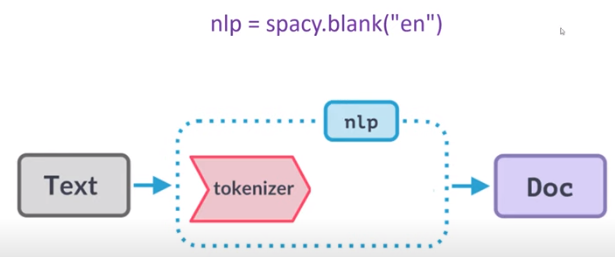
It only contains a tokenizer shown as above.
- You can not use functionality such as doc.sents with this blank pipeline
- You need to add a sentencizer to you blank pipeline

You can load a pretrained pipeline likes this:
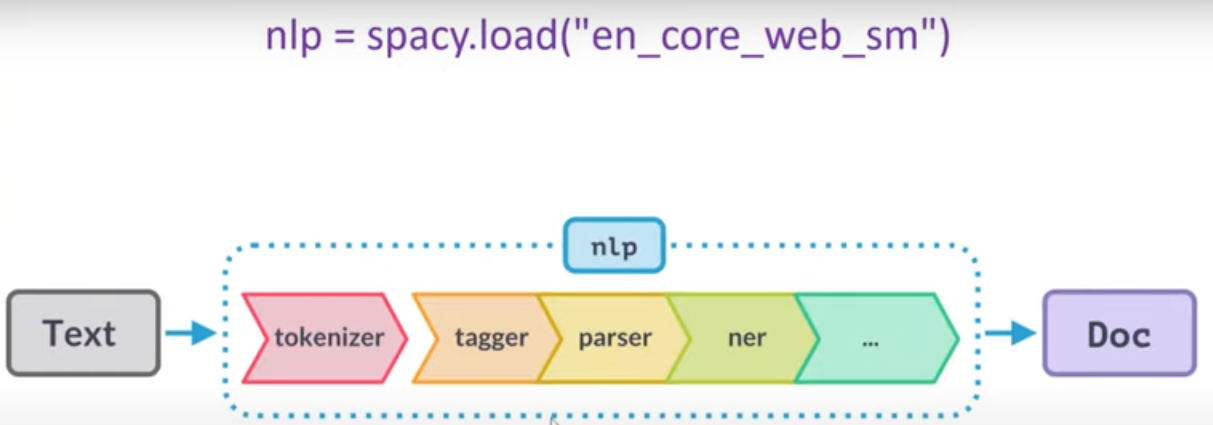

- Here we will start with adding compoenents to our blank pipeline

In [13]:
print("The pipeline looks like this initially:",nlp.pipe_names)
#component to split into sentences
nlp.add_pipe("sentencizer")
print("After addition it looks like this:",nlp.pipe_names)
doc  = nlp("Dr. Strange likes indian street food. Hulk love papdi chaat.")
for sentence in doc.sents:
    print(sentence)

The pipeline looks like this initially: []
After addition it looks like this: ['sentencizer']
Dr. Strange likes indian street food.
Hulk love papdi chaat.


### Exercise
(1) Think stats is a free book to study statistics (https://greenteapress.com/thinkstats2/thinkstats2.pdf)

This book has references to many websites from where you can download free datasets. You are an NLP engineer working for some company and you want to collect all dataset websites from this book. To keep exercise simple you are given a paragraph from this book and you want to grab all urls from this paragraph using spacy

In [14]:
#Homework
text='''
Look for data to help you address the question. Governments are good
sources because data from public research is often freely available. Good
places to start include http://www.data.gov/, and http://www.science.
gov/, and in the United Kingdom, http://data.gov.uk/.
Two of my favorite data sets are the General Social Survey at http://www3.norc.org/gss+website/, 
and the European Social Survey at http://www.europeansocialsurvey.org/.
'''

# TODO: Write code here
# Hint: token has an attribute that can be used to detect a url
doc = nlp(text)
for token in doc:
    if token.like_url:
        print("URL is:",token)

URL is: http://www.data.gov/
URL is: http://www.science
URL is: http://data.gov.uk/.
URL is: http://www3.norc.org/gss+website/
URL is: http://www.europeansocialsurvey.org/.


(2) Extract all money transaction from below sentence along with currency. Output should be,

two $

500 €

In [15]:
transactions = "Tony gave two $ to Peter, Bruce gave 500 € to Steve"

# TODO: Write code here
# Hint: Use token.i for the index of a token and token.is_currency for currency symbol detection
doc = nlp(transactions)
for token in doc:
    if token.like_num and doc[token.i+1].is_currency:
        print(token,doc[token.i+1])

two $
500 €


# 5. Language processing pipeline in spacy
- tagger give you part of speech
- lemmatizer gives you base word
- ner gives you entities

In [16]:
nlp = spacy.load("en_core_web_sm")
#what does the pipeline contain
print("Pipeline:",nlp.pipe_names)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [17]:
doc = nlp('''Captain America ate 100$ of pani puri and then he said "I can do this all day".''')
for token in doc:
    #word | part of speech | base word
    print(token, "|", token.pos_,"|", token.lemma_)

Captain | PROPN | Captain
America | PROPN | America
ate | VERB | eat
100 | NUM | 100
$ | NUM | $
of | ADP | of
pani | ADJ | pani
puri | PROPN | puri
and | CCONJ | and
then | ADV | then
he | PRON | he
said | VERB | say
" | PUNCT | "
I | PRON | I
can | AUX | can
do | VERB | do
this | PRON | this
all | DET | all
day | NOUN | day
" | PUNCT | "
. | PUNCT | .


In [20]:
#ner application
doc = nlp("Tesla Inc is going to acquire Twitter for $45 billion.")
for ent in doc.ents:
    print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))
#How cool is this?

Tesla Inc | ORG | Companies, agencies, institutions, etc.
Twitter | PRODUCT | Objects, vehicles, foods, etc. (not services)
$45 billion | MONEY | Monetary values, including unit


In [21]:
#Visualization application
from spacy import displacy
displacy.render(doc, style = "ent")

In [22]:
#Another way to make additions to blank pipelines
source_nlp = spacy.load("en_core_web_sm")

#add ner to blank pipeline
nlp = spacy.blank("en")
nlp.add_pipe("ner", source = source_nlp)
print("Blank pipeline after addition:",nlp.pipe_names)

Blank pipeline after addition: ['ner']


# 6. Stemming and Lemmatization
- Stemming is basic and primary in the sense that it follows a set of rules in removing some prefix or suffix values to convert the word into its base form
- Spacy does not have support for stemming so nltk is used
- Lemmatization is a little more advanced because it requires understanding of the language.

In [23]:
#Stemming in nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

words = ["eating", "eats", "eat", "ate", "adjustable", "rafting", "ability", "meeting"]

for word in words:
    print(word, "|", stemmer.stem(word))

eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet


In [24]:
#Lemmatization in Spacy
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("eating eats eat ate adjustable rafting ability meeting better")
for token in doc:
    print(token, " | ", token.lemma_)

eating  |  eat
eats  |  eat
eat  |  eat
ate  |  eat
adjustable  |  adjustable
rafting  |  raft
ability  |  ability
meeting  |  meeting
better  |  well


In [26]:
#Customizing lemmatizer
print("NLP spacy pipeline:",nlp.pipe_names)
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{"TEXT":"Bro"}],[{"TEXT":"Brah"}]],{"LEMMA":"Brother"})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted")
for token in doc:
    print(token.text, "|", token.lemma_)

NLP spacy pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Bro | Brother
, | ,
you | you
wanna | wanna
go | go
? | ?
Brah | Brother
, | ,
do | do
n't | not
say | say
no | no
! | !
I | I
am | be
exhausted | exhaust


### Exercise 1

In [28]:
#Stemming and Lemmatization: Exercises
#Run this cell to import all necessary packages
#let import necessary libraries and create the object

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#downloading all neccessary packages related to nltk
#nltk.download('all')


#for spacy
import spacy
nlp = spacy.load("en_core_web_sm")

#Exercise1:

#Convert these list of words into base form using Stemming and Lemmatization and observe the transformations
#Write a short note on the words that have different base words using stemming and Lemmatization
#using stemming in nltk
lst_words = ['running', 'painting', 'walking', 'dressing', 'likely', 'children', 'whom', 'good', 'ate', 'fishing']
print("Stemming")
for word in words:
    print(word, "|", stemmer.stem(word))

#using lemmatization in spacy
print("\nLemmatization")
doc = nlp("running painting walking dressing likely children who good ate fishing")
for token in doc:
    print(token, "|", token.lemma_)

Stemming
eating | eat
eats | eat
eat | eat
ate | ate
adjustable | adjust
rafting | raft
ability | abil
meeting | meet

Lemmatization
running | run
painting | paint
walking | walk
dressing | dress
likely | likely
children | child
who | who
good | good
ate | eat
fishing | fishing


### Exercise2:

convert the given text into it's base form using both stemming and lemmatization


In [35]:
text = """Latha is very multi talented girl.She is good at many skills like dancing, running, singing, playing.She also likes eating Pav Bhagi. she has a 
habit of fishing and swimming too.Besides all this, she is a wonderful at cooking too.
"""

#Stemming via nltk
from nltk.tokenize import word_tokenize
text_token = word_tokenize(text)
#stemmer
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
#stem the words
print("Stemming:")
stemmed_sentence = ""
for word in text_token:
    print(word,"|", stemmer.stem(word))
    stemmed_sentence += stemmer.stem(word)
stemmed_sentence = " ".join(stemmed_sentence)
print("Sentence after stemming:", stemmed_sentence)

#lemmatizaion via spacy
doc = nlp(stemmed_sentence)
print("\nLemmatization:")
lemmatized_sentence = ""
for token in doc:
    print(token, "|", token.lemma_)
    lemmatized_sentence += token.lemma_
print("Sentence after lemmatization:",lemmatized_sentence)

Stemming:
Latha | latha
is | is
very | veri
multi | multi
talented | talent
girl.She | girl.sh
is | is
good | good
at | at
many | mani
skills | skill
like | like
dancing | danc
, | ,
running | run
, | ,
singing | sing
, | ,
playing.She | playing.sh
also | also
likes | like
eating | eat
Pav | pav
Bhagi | bhagi
. | .
she | she
has | ha
a | a
habit | habit
of | of
fishing | fish
and | and
swimming | swim
too.Besides | too.besid
all | all
this | thi
, | ,
she | she
is | is
a | a
wonderful | wonder
at | at
cooking | cook
too | too
. | .
Sentence after stemming: lathaisverimultitalentgirl.shisgoodatmaniskilllikedanc,run,sing,playing.shalsolikeeatpavbhagi.shehaahabitoffishandswimtoo.besidallthi,sheisawonderatcooktoo.

Lemmatization:
Latha | Latha
is | be
very | very
multi | multi
talented | talented
girl | girl
. | .
She | she
is | be
good | good
at | at
many | many
skills | skill
like | like
dancing | dancing
, | ,
running | running
, | ,
singing | singing
, | ,
playing | play
. | .
She | sh

# 7. Parts of speech: POS Tagging
- A trained model is able to get this information about parts of speech because of the different components in the pipeline.
- A blank pipeline will not be able to give this information about language intrinsics.
- tag_ gives even more detailed information such as the tense of the verb
- All this information is goint be very useful in the NLP piepiline

In [40]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = '''Elon Musk flew to Mars yesterday. He carried pani puri with him.'''
doc = nlp(text)
print("Pipeline contains:",nlp.pipe_names, "\n")
for token in doc:
    print(token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_))

Pipeline contains: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'] 

Elon | PROPN | proper noun | NNP | noun, proper singular
Musk | PROPN | proper noun | NNP | noun, proper singular
flew | VERB | verb | VBD | verb, past tense
to | ADP | adposition | IN | conjunction, subordinating or preposition
Mars | PROPN | proper noun | NNP | noun, proper singular
yesterday | NOUN | noun | NN | noun, singular or mass
. | PUNCT | punctuation | . | punctuation mark, sentence closer
He | PRON | pronoun | PRP | pronoun, personal
carried | VERB | verb | VBD | verb, past tense
pani | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
puri | X | other | FW | foreign word
with | ADP | adposition | IN | conjunction, subordinating or preposition
him | PRON | pronoun | PRP | pronoun, personal
. | PUNCT | punctuation | . | punctuation mark, sentence closer


In [42]:
#Remove punctuation and extra characters that do not contribute to our model
text = '''Earnings Release FY23 Q1
Microsoft Cloud Strength Drives First Quarter Results

REDMOND, Wash. — October 25, 2022 — Microsoft Corp. today announced the following results for the quarter ended September 30, 2022, as compared to the corresponding period of last fiscal year:

·        Revenue was $50.1 billion and increased 11% (up 16% in constant currency)

·        Operating income was $21.5 billion and increased 6% (up 15% in constant currency)

·        Net income was $17.6 billion and decreased 14% (down 8% in constant currency)

·        Diluted earnings per share was $2.35 and decreased 13% (down 7% in constant currency)

“In a world facing increasing headwinds, digital technology is the ultimate tailwind,” said Satya Nadella, chairman and chief executive officer of Microsoft. “In this environment, we’re focused on helping our customers do more with less, while investing in secular growth areas and managing our cost structure in a disciplined way."'''
#create doc for the above text 
doc = nlp(text)
#save the filtered text after removing unwanted parts
filtered_token = []
for token in doc:
    if token.pos_ not in ["SPACE", "X", "PUNCT"]:
        print(token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_))
        filtered_token.append(token)
print("\nToken after filtering:",filtered_token)

Earnings | PROPN | proper noun | NNP | noun, proper singular
Release | PROPN | proper noun | NNP | noun, proper singular
FY23 | PROPN | proper noun | NNP | noun, proper singular
Q1 | PROPN | proper noun | NNP | noun, proper singular
Microsoft | PROPN | proper noun | NNP | noun, proper singular
Cloud | PROPN | proper noun | NNP | noun, proper singular
Strength | PROPN | proper noun | NNP | noun, proper singular
Drives | VERB | verb | VBZ | verb, 3rd person singular present
First | PROPN | proper noun | NNP | noun, proper singular
Quarter | PROPN | proper noun | NNP | noun, proper singular
Results | PROPN | proper noun | NNPS | noun, proper plural
REDMOND | PROPN | proper noun | NNP | noun, proper singular
Wash. | PROPN | proper noun | NNP | noun, proper singular
October | PROPN | proper noun | NNP | noun, proper singular
25 | NUM | numeral | CD | cardinal number
2022 | NUM | numeral | CD | cardinal number
Microsoft | PROPN | proper noun | NNP | noun, proper singular
Corp. | PROPN | prop

In [49]:
#Count the difference parts of speech in the text
count = doc.count_by(spacy.attrs.POS)
print("count_by counts each POS in the text but with their numeric key:",count)
for key, values in count.items():
    #ho to access the type of POS? use doc.vocab
    print(doc.vocab[key].text, "|", values)

count_by counts each POS in the text but with their numeric key: {96: 19, 103: 11, 100: 20, 97: 30, 93: 19, 92: 35, 90: 7, 85: 15, 98: 2, 84: 16, 87: 5, 99: 4, 89: 6, 86: 4, 95: 3}
PROPN | 19
SPACE | 11
VERB | 20
PUNCT | 30
NUM | 19
NOUN | 35
DET | 7
ADP | 15
SCONJ | 2
ADJ | 16
AUX | 5
SYM | 4
CCONJ | 6
ADV | 4
PRON | 3


### Exercise
Extract NOUN and NUM tokens

Print a count of all POS tags

In [70]:
#Access the file provided
with open("news_story.txt") as file:
    text_list = file.readlines()
text = " ".join(text_list)
print("Text in the file:\n",text)

Text in the file:
 Inflation rose again in April, continuing a climb that has pushed consumers to the brink and is threatening the economic expansion, the Bureau of Labor Statistics reported Wednesday.
 
 The consumer price index, a broad-based measure of prices for goods and services, increased 8.3% from a year ago, higher than the Dow Jones estimate for an 8.1% gain. That represented a slight ease from March’s peak but was still close to the highest level since the summer of 1982.
 
 Removing volatile food and energy prices, so-called core CPI still rose 6.2%, against expectations for a 6% gain, clouding hopes that inflation had peaked in March.
 
 The month-over-month gains also were higher than expectations — 0.3% on headline CPI versus the 0.2% estimate and a 0.6% increase for core, against the outlook for a 0.4% gain.
 
 The price gains also meant that workers continued to lose ground. Real wages adjusted for inflation decreased 0.1% on the month despite a nominal increase of 0.3

In [66]:
doc = nlp(text)
nouns = []
nums = []
for token in doc:
    print(token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_))

    if token.pos_ == "NOUN":
        #print("Noun is:", token)
        nouns.append(token)
    if token.pos_ == "NUM":
        #print("Number is :",token)
        nums.append(token)
print("The nouns are:",nouns,"\n")
print("The numbers are:",nums)

Inflation | NOUN | noun | NN | noun, singular or mass
rose | VERB | verb | VBD | verb, past tense
again | ADV | adverb | RB | adverb
in | ADP | adposition | IN | conjunction, subordinating or preposition
April | PROPN | proper noun | NNP | noun, proper singular
, | PUNCT | punctuation | , | punctuation mark, comma
continuing | VERB | verb | VBG | verb, gerund or present participle
a | DET | determiner | DT | determiner
climb | NOUN | noun | NN | noun, singular or mass
that | PRON | pronoun | WDT | wh-determiner
has | AUX | auxiliary | VBZ | verb, 3rd person singular present
pushed | VERB | verb | VBN | verb, past participle
consumers | NOUN | noun | NNS | noun, plural
to | ADP | adposition | IN | conjunction, subordinating or preposition
the | DET | determiner | DT | determiner
brink | NOUN | noun | NN | noun, singular or mass
and | CCONJ | coordinating conjunction | CC | conjunction, coordinating
is | AUX | auxiliary | VBZ | verb, 3rd person singular present
threatening | VERB | verb 

nominal | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
increase | NOUN | noun | NN | noun, singular or mass
of | ADP | adposition | IN | conjunction, subordinating or preposition
0.3 | NUM | numeral | CD | cardinal number
% | NOUN | noun | NN | noun, singular or mass
in | ADP | adposition | IN | conjunction, subordinating or preposition
average | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
hourly | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
earnings | NOUN | noun | NNS | noun, plural
. | PUNCT | punctuation | . | punctuation mark, sentence closer
Over | ADP | adposition | IN | conjunction, subordinating or preposition
the | DET | determiner | DT | determiner
past | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
year | NOUN | noun | NN | noun, singular or mass
, | PUNCT | punctuation | , | punctuation mark, comma
real | ADJ | adjective | JJ | adjective (English), other no

### Customizing tag_ and pos_
NOUN to SYM

In [71]:
#Th above code is counting the symbol % as noun.
#Let us customize its tag so it is seen as a symbol
doc = nlp(text)
ruler = nlp.get_pipe('attribute_ruler')
#pattern text we are customizing
#We are trying to customize %, it's tag_ is NN and it's pos_ is NOUN
patterns = [[{"TEXT": "%"}]]
# The attributes to assign to the matched token
attrs = {"TAG": "%", "POS": "SYM"}
ruler.add(patterns = patterns, attrs = attrs, index=0)
for token in doc:
    print(token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_))


Inflation | NOUN | noun | NN | noun, singular or mass
rose | VERB | verb | VBD | verb, past tense
again | ADV | adverb | RB | adverb
in | ADP | adposition | IN | conjunction, subordinating or preposition
April | PROPN | proper noun | NNP | noun, proper singular
, | PUNCT | punctuation | , | punctuation mark, comma
continuing | VERB | verb | VBG | verb, gerund or present participle
a | DET | determiner | DT | determiner
climb | NOUN | noun | NN | noun, singular or mass
that | PRON | pronoun | WDT | wh-determiner
has | AUX | auxiliary | VBZ | verb, 3rd person singular present
pushed | VERB | verb | VBN | verb, past participle
consumers | NOUN | noun | NNS | noun, plural
to | ADP | adposition | IN | conjunction, subordinating or preposition
the | DET | determiner | DT | determiner
brink | NOUN | noun | NN | noun, singular or mass
and | CCONJ | coordinating conjunction | CC | conjunction, coordinating
is | AUX | auxiliary | VBZ | verb, 3rd person singular present
threatening | VERB | verb 

/home/himanshi/.local/lib/python3.10/site-packages/spacy/glossary.py:19: UserWarning: [W118] Term '%' not found in glossary. It may however be explained in documentation for the corpora used to train the language. Please check `nlp.meta["sources"]` for any relevant links.
  warnings.warn(Warnings.W118.format(term=term))


 adposition | IN | conjunction, subordinating or preposition
expectations | NOUN | noun | NNS | noun, plural
for | ADP | adposition | IN | conjunction, subordinating or preposition
a | DET | determiner | DT | determiner
6 | NUM | numeral | CD | cardinal number
% | SYM | symbol | % | None
gain | NOUN | noun | NN | noun, singular or mass
, | PUNCT | punctuation | , | punctuation mark, comma
clouding | VERB | verb | VBG | verb, gerund or present participle
hopes | NOUN | noun | NNS | noun, plural
that | SCONJ | subordinating conjunction | IN | conjunction, subordinating or preposition
inflation | NOUN | noun | NN | noun, singular or mass
had | AUX | auxiliary | VBD | verb, past tense
peaked | VERB | verb | VBN | verb, past participle
in | ADP | adposition | IN | conjunction, subordinating or preposition
March | PROPN | proper noun | NNP | noun, proper singular
. | PUNCT | punctuation | . | punctuation mark, sentence closer

 
  | SPACE | space | _SP | whitespace
The | DET | determiner | D

has | AUX | auxiliary | VBZ | verb, 3rd person singular present
spread | VERB | verb | VBN | verb, past participle
beyond | ADP | adposition | IN | conjunction, subordinating or preposition
those | DET | determiner | DT | determiner
two | NUM | numeral | CD | cardinal number
areas | NOUN | noun | NNS | noun, plural
into | ADP | adposition | IN | conjunction, subordinating or preposition
housing | NOUN | noun | NN | noun, singular or mass
, | PUNCT | punctuation | , | punctuation mark, comma
auto | NOUN | noun | NN | noun, singular or mass
sales | NOUN | noun | NNS | noun, plural
and | CCONJ | coordinating conjunction | CC | conjunction, coordinating
a | DET | determiner | DT | determiner
host | NOUN | noun | NN | noun, singular or mass
of | ADP | adposition | IN | conjunction, subordinating or preposition
other | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese)
areas | NOUN | noun | NNS | noun, plural
. | PUNCT | punctuation | . | punctuation mark, sentence clo

# 8. Named Entity Recognition
- ner in the nlp pipeline gives contect to words


How to build your own ner?
- Manually add the ent for each text, then use lookup to access it
- Follow a set of rules to identify text such as "inc" refers to an organization or such
- CRF Conditional Random Fields BERT is used for ner in machine learning

In [73]:
doc = nlp("Tesla Inc is going to acquire twitter for $45 billion")
#access entities
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

from spacy import displacy

displacy.render(doc, style="ent")

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
$45 billion  |  MONEY  |  Monetary values, including unit


In [74]:
##List down all the entities
nlp.pipe_labels['ner']

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

### Setting custom entities

In [78]:

doc = nlp("Tesla is going to acquire Twitter for $45 billion")
print("Before customization")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)
    
#select a span of the doc
from spacy.tokens import Span
s1 = Span(doc, 0, 1, label = "ORG")
s2 = Span(doc, 5, 6, label = "ORG")
print("\nAfter customization")
doc.set_ents([s1, s2], default = "unmodified")
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Before customization
Tesla  |  ORG
Twitter  |  PRODUCT
$45 billion  |  MONEY

After customization
Tesla  |  ORG
Twitter  |  ORG
$45 billion  |  MONEY


### Excersie: 1
Extract all the Geographical (cities, Countries, states) names from a given text

In [82]:

text = """Kiran want to know the famous foods in each state of India. So, he opened Google and search for this question. Google showed that
in Delhi it is Chaat, in Gujarat it is Dal Dhokli, in Tamilnadu it is Pongal, in Andhrapradesh it is Biryani, in Assam it is Papaya Khar,
in Bihar it is Litti Chowkha and so on for all other states"""

doc = nlp(text)
##List down all the entities
print("Entities are:")
print(nlp.pipe_labels['ner'])
for ent in doc.ents:
    if ent.label_ == 'GPE':
        print(ent.text, " | ", ent.label_)

Entities are:
['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']
India  |  GPE
Delhi  |  GPE
Gujarat  |  GPE
Tamilnadu  |  GPE
Pongal  |  GPE
Andhrapradesh  |  GPE
Assam  |  GPE
Bihar  |  GPE


In [83]:
#Extract all the birth dates of cricketers in the given Text
text = """Sachin Tendulkar was born on 24 April 1973, Virat Kholi was born on 5 November 1988, Dhoni was born on 7 July 1981
and finally Ricky ponting was born on 19 December 1974."""

doc = nlp(text)
for ent in doc.ents:
    if ent.label_ == 'DATE':
        print(ent.text, " | ", ent.label_)

24 April 1973  |  DATE
5 November 1988  |  DATE
7 July 1981  |  DATE
19 December 1974  |  DATE


## Extracting features from text is called Text Representation
- For example if a word has been converted to a vector then each number in that vector represents a feature.
- We need to perform feature extraction/text representation in the most efficient way to avoid "Garbage In Garbage Out."

# Vector Space Model
The process of representing text as vector is called Vector Space Model.  
Examples include:
- Label Encoding  
Build a vocabulary from the entire text and assign a number to each word and use that number as an identifer to the text. 
- One Hote Encoding  
All words are construed as features and the row is given value 1 when we encounter the word otherwise zero such as [0, 0, 0, .....1, 0, 0, 0, 0] suggests that the word in that column is what we are reading.  


Issues with the above two methods:  
Does not capture the meaning of the word  
Can take up huge memory of space depending on the vocabulary    
Out of Vocabulary problem     


- Bag of Words
It is based on the count vectorizer. Build a vocabulary out of the text and then each vector defines the number of occurrences of each word.  
It still takes up huge amount of space but is better than one hot encoding because in OHE each word is converted to a vector the length of the complete vocabulary  
But in Bag of Words a para (not each word) can be coverted to a vector which will be the length of the vocabulary.  
It is sparse representation.
Does not capture the meaning of the word.  
- TF-IDF
- Word Embeddings

# 9. Bag of Words: Apply on a spam/ham dataset using sklearn

In [108]:
import pandas as pd
import numpy as np
pd.option_context("display.max_columns", None)
df = pd.read_csv("spam.csv")
display(df)
#Convert category to binary
df['Category'] = df['Category'].apply(lambda x: 1 if x == "spam" else 0)
display(df)
#Split data into train nd test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size = 0.2, shuffle = True, stratify = df['Category'])
print("Size of training set:",X_train.shape)
print("Size of test shape:",X_test.shape)
#Import count vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()
#Transform trainging data; pass it as a numpy array
X_train_cv = counter.fit_transform(X_train.values)
print("What does the count vectorizer look like?:", X_train_cv.toarray())
print("The shape of the training set after applying count vectorizer:", X_train_cv.shape)
#This shows that the length of the vector shoul be equal to the lenght of the vocabulary
#Let's take a look at the vocabulary
print("Vocabulary:",counter.get_feature_names_out()[2000:])
#print("Vocabulary with position:", counter.vocabulary_)
#Now it's time to use the machine learning model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_cv, y_train)
#transform test data to test
X_test_cv = counter.transform(X_test)
#get score
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_cv)
print("\n",classification_report(y_test, y_pred))

#Automate the above process using a pipiline
print("\nUse a pipeline for the above tasks")
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb", MultinomialNB())
])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\n",classification_report(y_test, y_pred))


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Size of training set: (4457,)
Size of test shape: (1115,)
What does the count vectorizer look like?: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
The shape of the training set after applying count vectorizer: (4457, 7782)
Vocabulary: ['contains' 'content' 'contented' ... 'zyada' 'èn' 'ú1']

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115


Use a pipeline for the above tasks

               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      

# 10. Stop Words: Remove Stop words from a complete dataset
Removing stop words from the text that may not contribute to the model can help with sparse matrix.  
It can cause loss of pertinent information and should be used carefully with the problem statement in mind.
One should not remove Stop words:
- Chat bot, Q/A system
- Language translation
- Anywhere you can not afford loss of information, somtimes even sentiment analysis


In the next section stop words are removed from an example text to start with and then we apply it to a pandas column.

In [112]:
from spacy.lang.en.stop_words import STOP_WORDS
print("Stop words are:", STOP_WORDS)
#create a function for preprocessing of stop words
def preprocess(text):
    doc = nlp(text)
    no_stop_words = []
    for token in doc:
        if not token.is_stop:
            no_stop_words.append(token.text)
    return " ".join(no_stop_words)

preprocess('''We are the champions of pani puri contest.''')

Stop words are: {'becomes', '’ll', 'one', 'have', 'him', '‘re', 'wherever', 'within', 'hereupon', 'whatever', 'someone', 'next', 'former', 'call', 'all', 'sometimes', 'on', 'without', 'so', 'seem', 'two', 'the', 'were', 'together', "'ll", 'by', 'made', 'most', '’m', 'whence', 'neither', 'then', 'she', 'onto', 'they', 'always', 'five', 'done', 'same', 'some', 'mostly', 'our', 'during', 'would', 'everything', 'am', 'do', 'others', 're', 'your', 'who', 'over', '‘d', 'whom', 'was', 'toward', 'further', 'twelve', 'much', 'whose', "'d", 'quite', '’re', 'becoming', 'upon', 'among', 'twenty', 'ourselves', 'elsewhere', 'where', 'put', 'therefore', 'ten', 'are', 'top', 'own', 'became', 'whoever', 'why', 'both', 'used', 'those', 'between', '’d', 'an', '‘ve', 'is', 'sixty', 'itself', 'thence', 'now', 'perhaps', '‘ll', 'can', "'s", 'almost', 'anyway', 'yet', "'ve", 'should', 'this', 'everywhere', 'show', 'anyhow', 'below', 'eight', 'his', 'keep', 'above', 'nobody', 'out', 'well', 'however', 'whereb

'champions pani puri contest .'

### Remove Stop words from a complete dataset

In [121]:
df = pd.read_json("doj_press.json", lines = True)
display(df.head(3))
#We are interested in the topics columns so let's filter out rows that do not contain topics info
df = df[df['topics'].str.len() != 0]
print("After removing rows that do not contain topics info")
display(df.head(3))
#usually we might combine topics and contents for further analysis
#for the example here let's try to remove stop words from the text in contents column
df['contents'] = df['contents'].apply(preprocess)
print("After removing stop words from contents column")
display(df.head(3))

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]


After removing rows that do not contain topics info


,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,The United States Attorney’s Office for the Mi...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."


After removing stop words from contents column


,id,title,contents,date,topics,components
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"U.S. Department Justice , U.S. Environmental P...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
7,14-1412,14 Indicted in Connection with New England Com...,131 - count criminal indictment unsealed today...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
19,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,United States Attorney Office Middle District ...,2017-12-14T00:00:00-05:00,[Environment],"[Environment and Natural Resources Division, U..."


# 11. Bag of n-grams: Apply preprocessing ang Bag of ngrams to a complete dataset
Bag of words does not capture the relationship between words as it does not take into account the order of words.   
Bag of n-grams takes collection of n words and counts their occurence instead of counting the occurence of single words.   
It can be used as a 2-gram such that it creates a vocabulary of 2 words each (pairs) and counts the occurence of pairs.  
A 3-gram measures the occurence of 3 words each, so on and so forth.  

Bag of words is a special case of Bag of n-grams where n = 1.  
Often 1-gram and bi-gram are combined to make more meaningful vectors.  
Cons:
- As n increases, dimensionality increases, sparsity increases
- Doesn't address out of vocabulary problem

In [129]:
text = '''The hathodewala is looking for a job.'''
#Example of how 1-gram works
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(ngram_range = (1, 1))
counter.fit([text])
print("1-gram:",counter.vocabulary_, "\n") #vocab_ gives text with position

#Example of how 1-gram works
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(ngram_range = (2, 2))
counter.fit([text])
print("bi-gram:",counter.vocabulary_, "\n")

#Combination of grams
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(ngram_range = (1, 3))
counter.fit([text])
print("Combination of 1-gram, bi-gram and tri-gram:",counter.vocabulary_, "\n")

1-gram: {'the': 5, 'hathodewala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3} 

bi-gram: {'the hathodewala': 4, 'hathodewala is': 1, 'is looking': 2, 'looking for': 3, 'for job': 0} 

Combination of 1-gram, bi-gram and tri-gram: {'the': 12, 'hathodewala': 2, 'is': 5, 'looking': 9, 'for': 0, 'job': 8, 'the hathodewala': 13, 'hathodewala is': 3, 'is looking': 6, 'looking for': 10, 'for job': 1, 'the hathodewala is': 14, 'hathodewala is looking': 4, 'is looking for': 7, 'looking for job': 11} 



### Apply multiple preprocessings together
1. Apply it to a corpus
2. Use a dataframe and apply it on the whole data

In [26]:
corpus = ["Thor loves eating pizzza.",
         "Loke is eating chaat puri.",
         "Hulk turns green when he gets mad."]

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        #remove stop words and punctuation
        if token.is_stop or token.is_punct:
            continue
        #lemmatization
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

corpus_processed = [preprocess(text) for text in corpus]
print("Text after preprocessing:", corpus_processed)

Text after preprocessing: ['thor love eat pizzza', 'Loke eat chaat puri', 'Hulk turn green get mad']


In [27]:
#Bag of n-grams applied to the above corpus

from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer(ngram_range = (1, 1))
counter.fit(corpus_processed)
print("1-gram and b-gram combined vectorizer applied to corpus:", counter.vocabulary_)
counter.transform(corpus_processed).toarray()

1-gram and b-gram combined vectorizer applied to corpus: {'thor': 10, 'love': 6, 'eat': 1, 'pizzza': 8, 'loke': 5, 'chaat': 0, 'puri': 9, 'hulk': 4, 'turn': 11, 'green': 3, 'get': 2, 'mad': 7}


array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1]])

Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories:

BUSINESS  
SPORTS  
CRIME  
SCIENCE  
Dataset  
Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65  


This data consists of two columns. - Text - Category  
Text is a news article  
Category can be one of these 4: 'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'  
## News Classification
### SMOTE
**Attempt 1***: First try modeling without any preprocessing and using 1-gram vectorizer   


### Undersampling
**Attempt 2**: Without preprocessing and using 1-gram vectorizer  
**Attempt 3**: Without preprocessing and using 1-gram and bi-gram vectorizer  
**Attempt 4**: Apply preprocessing: remove stop words, punctuation and apply lemmatization and use 1-gram and bi-gram vectorizer  

In [14]:
import spacy
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
nlp = spacy.load("en_core_web_sm")
import pandas as pd
df = pd.read_json("news_dataset.json")
display(df.head(3))
print("Number of instances for each category in the complete set:\n", df['category'].value_counts(), "\n")
#Convert target to numeric
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df['category_num'] = df['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})

#split data into train and test
X, y = df['text'], df['category_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size = 0.2, stratify = df['category_num'])
print("Shape of training set:", X_train.shape)
print("Number of instances for each category in the training set:\n", y_train.value_counts(), "\n")
print("Shape of test set:", X_test.shape)
print("Number of instances for each category in the test set:\n", y_test.value_counts(), "\n")

#Use Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
#use count vetorizer on text
counter = CountVectorizer(ngram_range = (1, 1))
X_train_prepared = counter.fit_transform(X_train)
X_test_prepared = counter.transform(X_test)

#To deal with the fewer number of instances in the SCIENCE category we use SMOTE
#define smote
smt = SMOTE(random_state = 32)

# fit and apply the transform
X_prepared_smt, y_prepared_smt = smt.fit_resample(X_train_prepared, y_train)
print("SMOTE")
print("Shape of training set:", X_prepared_smt.shape)
print("Number of instances for each category in the training set after using SMOTE:\n", y_prepared_smt.value_counts(), "\n")

#Time to use machine learning!!
model = MultinomialNB()
model.fit(X_prepared_smt, y_prepared_smt)
y_pred = model.predict(X_test_prepared)
#print the classfication report
print(classification_report(y_test, y_pred))

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS


Number of instances for each category in the complete set:
 BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64 

Shape of training set: (10156,)
Number of instances for each category in the training set:
 0    3403
1    3334
2    2314
3    1105
Name: category_num, dtype: int64 

Shape of test set: (2539,)
Number of instances for each category in the test set:
 0    851
1    833
2    579
3    276
Name: category_num, dtype: int64 

SMOTE
Shape of training set: (13612, 20434)
Number of instances for each category in the training set after using SMOTE:
 3    3403
0    3403
2    3403
1    3403
Name: category_num, dtype: int64 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       851
           1       0.94      0.90      0.92       833
           2       0.88      0.90      0.89       579
           3       0.89      0.72      0.80       276

    accuracy                           0.89      25

### Undersampling with 1-gram

In [23]:
min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state = 2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples, random_state = 2022)
df_crime = df[df.category == "CRIME"].sample(min_samples, random_state = 2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples, random_state = 2022)
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science], axis = 0)
print("Underampling:", df_balanced.category.value_counts())

target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})
#Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text, 
    df_balanced.category_num, 
    test_size = 0.2, # 20% samples will go to test dataset
    random_state = 2022,
    stratify = df_balanced.category_num
)

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

Underampling: BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



### Undersampling with 1-gram and bi-gram

In [24]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



### Preprocessing and undersampling with 1-gram
- Preprocessing the reuslts improves the accuracy considerably

In [28]:
#apply preprocessing
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 
#split data
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



Text(69.0, 0.5, 'Truth')

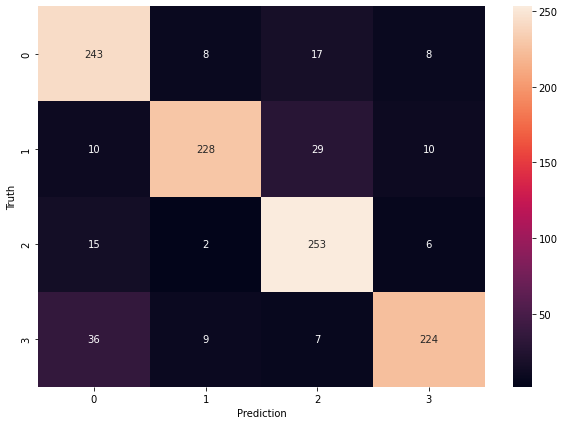

In [30]:
#Visualize results
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# 12. Text Representation using TF-IDF
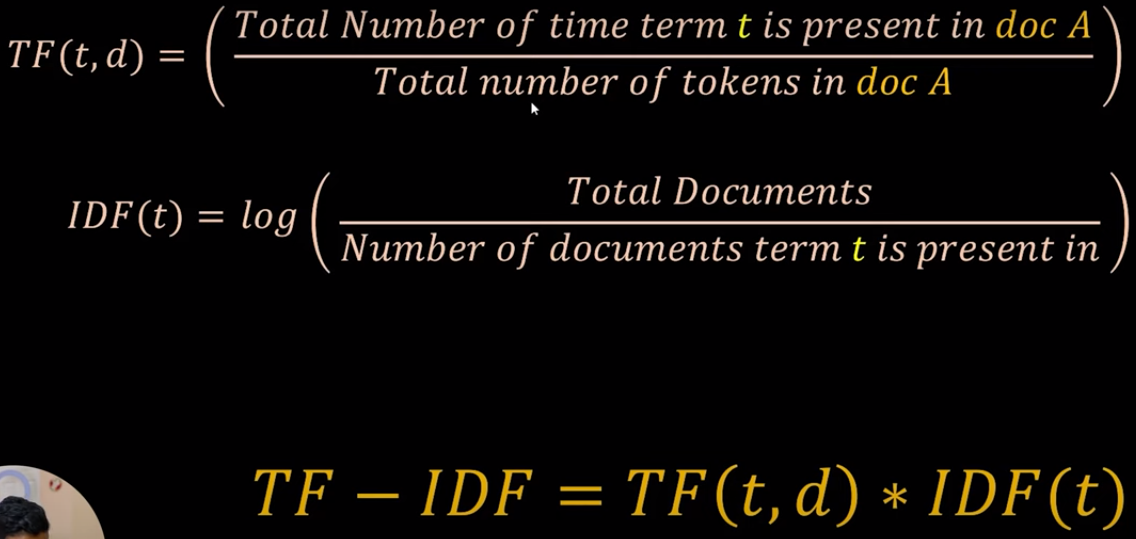

"log" is used to dampen the affect of extremely large numbers.  


Cons:
- As vocabulary increases, sparsity increases
- Does not capture the relationship between words
- Also suffers from out of vocabulary problem


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

vectorizer = TfidfVectorizer()
transformed_corpus = vectorizer.fit_transform(corpus)
print("vocabulary:",vectorizer.vocabulary_, "\n")
print(dir(vectorizer),"\n")
all_feature_names = vectorizer.get_feature_names_out()
print("Feature names:", all_feature_names, "\n")
print("idf scores")
for word in all_feature_names:
    
    #let's get the index in the vocabulary
    indx = vectorizer.vocabulary_.get(word)
    
    #get the score
    idf_score = vectorizer.idf_[indx]
    
    print(f"{word} : {idf_score}")
    
#let's print the transformed output from tf-idf
print("\nBefore transformation:\n", corpus[:2])
print("\nTransformed output")
print(transformed_corpus.toarray()[:2])

vocabulary: {'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13} 

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_char_ngrams', '_char_wb_ngrams', '_check_feature_names', '_check_n_features', '_check_params', '_check_stop_words_consistency', '_check_vocabulary', '_count_vocab', '_get_param_names', '_get_tags', '_limit_features', '_more_tags',

## E-Commerce product classification using text
Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories  
Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification  

This data consists of two columns.   
*Text*: Description of an item sold on e-commerce website  
*Label*: Category of that item.   
Total 4 categories:   
"Electronics"  
"Household"   
"Books"  
"Clothing & Accessories"  

**Attempt 1**:   
No text preprocessing but we use Tf-Idf for Text Representation  
Models we compare: KNN, MultinomialNB, RandomForest  
**Attempt 2**:  
Text preprocessing is applied including removing stop words, punctuation and converting to lemma.    
Models compared: KNN, MultinomialNB, RandomForest    

In [61]:
import pandas as pd

#read the data into a pandas dataframe
df = pd.read_csv("Ecommerce_data.csv")
print("Shape of complete dataset:", df.shape)
df.head(5)

#Transform target feature to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])
print("Classes transformed using LabelEncoder:", le.classes_)
display(df)

print("Are the class labels balanced?")
print(df['label'].value_counts())

#define X and y
X = df['Text']
y = df['label_num']

#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2022)
print("\nShape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

for key, values in {"KNN": KNeighborsClassifier(), "Multi NB": MultinomialNB(), "Random Forest": RandomForestClassifier()}.items():
    clf = Pipeline([
        ('vectorizer_tfidf',TfidfVectorizer()),
        (key, values)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"For model: {key} classification report:\n", classification_report(y_test, y_pred))

Shape of complete dataset: (24000, 2)
Classes transformed using LabelEncoder: ['Books' 'Clothing & Accessories' 'Electronics' 'Household']


,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,3
1,"Contrast living Wooden Decorative Box,Painted ...",Household,3
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,1
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,1
...,...,...,...
23995,Marvel Physics MCQ's for MHT - CET,Books,0
23996,Internet Download Manager | Lifetime License |...,Books,0
23997,Sadhubela's Handcrafted Iron Degchi Handi Pot ...,Household,3
23998,Audio-Technica AT-LP60 Automatic Belt Driven D...,Electronics,2


Are the class labels balanced?
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

Shape of training set: (19200,)
Shape of test set: (4800,)
For model: KNN classification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1200
           1       0.97      0.98      0.98      1200
           2       0.97      0.97      0.97      1200
           3       0.96      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800

For model: Multi NB classification report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96      1200
           1       0.98      0.99      0.98      1200
           2       0.97      0.97      0.97      1200
           3       0.93 

In [62]:
#Apply preprocessing
import spacy
nlp = spacy.load("en_core_web_sm")
#preprocess text
def preprocess(text):
    doc = nlp(text)
    processed_list = []
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        processed_list.append(token.lemma_)
    return " ".join(processed_list)

print("Compare a sample before and after preprocessing:")
df['Text_processed'] = df['Text'].apply(preprocess)
print("Before:", df.loc[0, 'Text'], "\nAfter:", df.loc[0, 'Text_processed'],"\n")

#define X and y
X = df['Text_processed']
y = df['label_num']

#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2022)
print("\nShape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

print("After applying preprocessing:\n")
for key, values in {"KNN": KNeighborsClassifier(), "Multi NB": MultinomialNB(), "Random Forest": RandomForestClassifier()}.items():
    clf = Pipeline([
        ('vectorizer_tfidf',TfidfVectorizer()),
        (key, values)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"For model: {key} classification report:\n", classification_report(y_test, y_pred))

Compare a sample before and after preprocessing:
Before: Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only. 
After: Urban Ladder Eisner low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimens

### Excercise
TF-IDF: Exercises  
Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.  

In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.  

For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!  

We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.  

About Data: Emotion Detection  
Credits: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp  

- This data consists of two columns. - Comment - Emotion  

- Comment are the statements or messages regarding to a particular event/situation.  

- Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.  

- As there are only 3 classes, this problem comes under the Multi-Class Classification.  

**Attempt 1:**  
No text preprocessing but we use CountVectorizer with tri-grams for Text Representation  
Models we compare: KNN, MultinomialNB, RandomForest  
**Attempt 2:**  
No text preprocessing but we use CountVectorizer with uni-gram and bi-grams for Text Representation  
Models we compare: KNN, MultinomialNB, RandomForest  
**Attempt 3:**
Text preprocessing is applied including removing stop words, punctuation and converting to lemma.  
Then Text representaion using Tf-Idf    
Models compared: KNN, MultinomialNB, RandomForest  

In [63]:
Prepare t#import pandas library
import pandas as pd

#read the dataset with name "Emotion_classify_Data.csv" and store it in a variable df
df = pd.read_csv("Emotion_classify_Data.csv")

#print the shape of dataframe
print("Shape on entire data:", df.shape)

#print top 5 rows
display(df.head(5))
#check the distribution of Emotions
print("\nDistribution of Emotions:\n", df['Emotion'].value_counts())

#Add the new column "Emotion_num" which gives a unique number to each of these Emotions
df['Emotion_num'] = df['Emotion'].map({'joy': 0, 'fear': 1, 'anger': 2})
#joy --> 0, fear --> 1, anger --> 2

#checking the results by printing top 5 rows
display(df.head(5))

#Modelling without Pre-processing Text data
#import train-test split
from sklearn.model_selection import train_test_split
#define X and y 
X = df['Comment']
y = df['Emotion_num']

#Do the 'train-test' splitting with test size of 20%
#Note: Give Random state 2022 and also do the stratify sampling
#print the shapes of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2022)
print("\nShape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

#import CountVectorizer, RandomForest, pipeline, classification_report from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

print("\nBefore applying preprocessing:")
for vectorizer_name, vectorizer_func in {"tri_grams": CountVectorizer(ngram_range = (3, 3)), "uni_bi_grams": CountVectorizer(ngram_range = (1, 2))}.items():
    print("Text representation applied using:", vectorizer_name)
    for key, values in {"KNN": KNeighborsClassifier(), "Multi NB": MultinomialNB(), "Random Forest": RandomForestClassifier()}.items():
        clf = Pipeline([
            (vectorizer_name, vectorizer_func),
            (key, values)
        ])
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"For model: {key} classification report:\n", classification_report(y_test, y_pred))
        
        
#After applying preprocessing
print("\n\nAfter applying preprocessing on text")
df['Comment_num'] = df['Comment'].apply(preprocess)
#define X and y 
X = df['Comment_num']
y = df['Emotion_num']

#Do the 'train-test' splitting with test size of 20%
#Note: Give Random state 2022 and also do the stratify sampling
#print the shapes of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2022)
#print("\nShape of training set:", X_train.shape)
#print("Shape of test set:", X_test.shape)


for vectorizer_name, vectorizer_func in {"tf-idf": TfidfVectorizer()}.items():
    print("Text representation applied using:", vectorizer_name)
    for key, values in {"KNN": KNeighborsClassifier(), "Multi NB": MultinomialNB(), "Random Forest": RandomForestClassifier()}.items():
        clf = Pipeline([
            (vectorizer_name, vectorizer_func),
            (key, values)
        ])
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"For model: {key} classification report:\n", classification_report(y_test, y_pred))

Shape on entire data: (5937, 2)


,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear



Distribution of Emotions:
 anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64


,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1



Shape of training set: (4749,)
Shape of test set: (1188,)
Before applying preprocessing:
Text representation applied using: tri_grams
For model: KNN classification report:
               precision    recall  f1-score   support

           0       0.37      0.12      0.18       400
           1       0.32      0.79      0.46       388
           2       0.38      0.11      0.17       400

    accuracy                           0.33      1188
   macro avg       0.36      0.34      0.27      1188
weighted avg       0.36      0.33      0.27      1188

For model: Multi NB classification report:
               precision    recall  f1-score   support

           0       0.48      0.65      0.55       400
           1       0.57      0.47      0.51       388
           2       0.54      0.44      0.49       400

    accuracy                           0.52      1188
   macro avg       0.53      0.52      0.52      1188
weighted avg       0.53      0.52      0.52      1188

For model: Random Fo

# 13. Word Embeddings
Tf-idf and Bag of words have limitations:    
- Similar words do not have similar vectors; do not capture the meaning of words  
- Sparse matric depending on the vocabulary  


But Word Embeddings work in a way that: 
- similar words have similar vectors  
- Dimensionality is low  


How does word embedding work?  
Think of this as solving a fake problem using neural networks and obtaining word vectors as a side-effect of solving the fake problem.     


Let's say for the corpus: "The king of the county has established his rule. The emperor is eccentric and suffers from severe ignorance." We are trying to predict the vector for "king" then we can use the context or the words around it as our training data and "king" as the target. When this neural network is run on this data, the weight vectors from the last layer are considered to be the word vector for king. Same context is applied for "emperor", since the target label for both will be similar the weight vector or eventually the word vector will be very close to the "king"'s word vector, hence capturing similarity.

Vector size will depend on the number of neurons in the last layer of the network. Usually the length of these vectors is 300/500.

### Word Embedding Techniques:
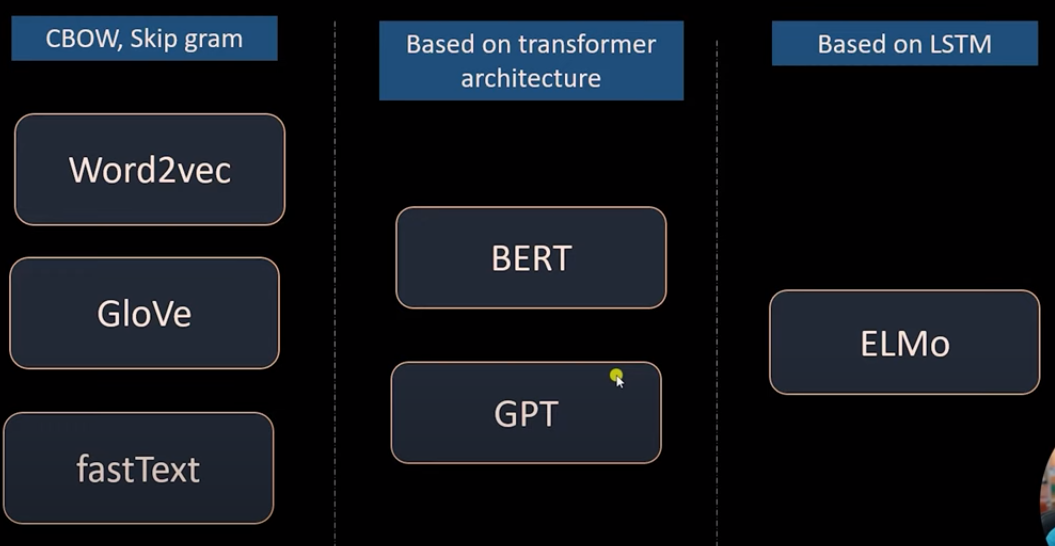

Word Embedding also enable us to do word arithmetic:
King - women = Queen as the vectors capture their meaning.  

Word Embeddings can vary based on which dataset they are trained on.     
If trained on twitter data, it will capture tweets better. Example: glove   

# Spacy word Embedding

In [67]:
import spacy
nlp = spacy.load("en_core_web_lg")
doc = nlp("dog cat banana asfrkln")
for token in doc:
    print(token.text, "vector:", token.has_vector, "OOV:", token.is_oov)

dog vector: True OOV: False
cat vector: True OOV: False
banana vector: True OOV: False
asfrkln vector: False OOV: True


In [70]:
#What is the shape of each word vector?
print("Shape of the word vector:", doc[0].vector.shape)
print("Vector:", doc[0].vector)

Shape of the word vector: (300,)
Vector: [ 1.2330e+00  4.2963e+00 -7.9738e+00 -1.0121e+01  1.8207e+00  1.4098e+00
 -4.5180e+00 -5.2261e+00 -2.9157e-01  9.5234e-01  6.9880e+00  5.0637e+00
 -5.5726e-03  3.3395e+00  6.4596e+00 -6.3742e+00  3.9045e-02 -3.9855e+00
  1.2085e+00 -1.3186e+00 -4.8886e+00  3.7066e+00 -2.8281e+00 -3.5447e+00
  7.6888e-01  1.5016e+00 -4.3632e+00  8.6480e+00 -5.9286e+00 -1.3055e+00
  8.3870e-01  9.0137e-01 -1.7843e+00 -1.0148e+00  2.7300e+00 -6.9039e+00
  8.0413e-01  7.4880e+00  6.1078e+00 -4.2130e+00 -1.5384e-01 -5.4995e+00
  1.0896e+01  3.9278e+00 -1.3601e-01  7.7732e-02  3.2218e+00 -5.8777e+00
  6.1359e-01 -2.4287e+00  6.2820e+00  1.3461e+01  4.3236e+00  2.4266e+00
 -2.6512e+00  1.1577e+00  5.0848e+00 -1.7058e+00  3.3824e+00  3.2850e+00
  1.0969e+00 -8.3711e+00 -1.5554e+00  2.0296e+00 -2.6796e+00 -6.9195e+00
 -2.3386e+00 -1.9916e+00 -3.0450e+00  2.4890e+00  7.3247e+00  1.3364e+00
  2.3828e-01  8.4388e-02  3.1480e+00 -1.1128e+00 -3.5598e+00 -1.2115e-01
 -2.0357e+

In [71]:
#Similarity between vectors
base_token = nlp("bread")
#other vectors
doc = nlp("sandwich burger car tiger human wheat")
for token in doc:
    print(token.text, "<-->", base_token.text, "<-->", token.similarity(base_token))

sandwich <--> bread <--> 0.6341067010130894
burger <--> bread <--> 0.47520687769584247
car <--> bread <--> 0.06451533308853552
tiger <--> bread <--> 0.04764611675903374
human <--> bread <--> 0.2151154210812192
wheat <--> bread <--> 0.6150360888607199


### Similarity means how often words appear in the same context and not synonyms or antonyms.

In [76]:
# Word arithmetic
king = nlp.vocab["king"].vector
man = nlp.vocab["man"].vector
woman = nlp.vocab["woman"].vector
queen = nlp.vocab["queen"].vector

result = king - man + woman
#print("result:",result)
#print("queen:",queen)

#compare cosine similarity of the two vectors
from sklearn.metrics.pairwise import cosine_similarity
print("Cosine similarity:", cosine_similarity([result], [queen]))

Cosine similarity: [[0.61780137]]


# Text classification using Spacy Word vectors
Problem Statement:  
- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.  

- Fake news spreads faster than real news and creates problems and fear among groups and in society.  

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.

- We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.

Dataset  
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset  
  
- This data consists of two columns. - Text - label

- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given text is Fake or Real.

- As there are only 2 classes, this problem comes under the Binary Classification.

In [78]:
import pandas as pd

#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("Fake_Real_Data.csv")

#print the shape of dataframe
print("Shape of DataFrame:",df.shape)

#print top 5 rows
display(df.head(5))

#check the distribution of labels 
df['label'].value_counts()

#Add the new column which gives a unique number to each of these labels 
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

#check the results with top 5 rows
display(df.head(5))

import spacy
nlp = spacy.load("en_core_web_lg")

#create vectors
df['vector'] = df['Text'].apply(lambda x: nlp(x).vector)  
display(df.head(5))

from sklearn.model_selection import train_test_split
#split data
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

import numpy as np
#convert to 2-D
print("Before stacking:",X_train)
X_train_2d = np.stack(X_train)
print("After stacking:",X_train_2d)
X_test_2d = np.stack(X_test)
#modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

Shape of DataFrame: (9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6759837, 1.4263071, -2.318466, -0.451093, ..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.8355803, 1.3101058, -2.4919677, 1.0268308,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-1.9851209, 0.14389805, -2.4221718, 0.9133005..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.2010763, 0.9961637, -2.4088492, 1.128273, ..."


Before stacking: [array([-2.26311374e+00,  3.07298154e-01, -1.33053243e+00,  8.23658347e-01,
         4.81299686e+00, -6.86131325e-03,  3.35425436e-01,  3.76113081e+00,
         5.39720833e-01, -1.42519677e+00,  4.56928253e+00,  1.55305433e+00,
        -3.53332734e+00,  6.87306941e-01, -5.81286728e-01,  2.71541500e+00,
         1.39683473e+00,  9.30782378e-01, -8.92450333e-01, -1.38076222e+00,
         1.36910903e+00, -1.13511407e+00, -9.53715205e-01,  8.05722892e-01,
         6.48910582e-01, -1.65908492e+00, -2.64194083e+00, -5.77975094e-01,
        -1.42578706e-02,  2.33008236e-01,  2.95631811e-02,  2.99089730e-01,
        -4.90643919e-01, -1.33279932e+00, -2.74737763e+00, -9.77295876e-01,
        -5.31269848e-01,  1.10031247e+00,  4.24643457e-01, -3.41824055e-01,
         2.72467971e-01,  8.62076208e-02, -2.81822890e-01, -2.08477139e-01,
        -1.27764702e+00,  8.22918952e-01,  7.95027316e-01, -1.89551938e+00,
        -6.20176196e-01,  1.51363051e+00, -1.33685195e+00,  1.80549657e

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1024
           1       0.94      0.95      0.94       956

    accuracy                           0.94      1980
   macro avg       0.94      0.94      0.94      1980
weighted avg       0.94      0.94      0.94      1980



# Word Embedding in Gensim
Gensim is another python library that is mainly used of topic modeling


In [2]:
import gensim.downloader as api
#which dataset or what kind of word embedding you want to download
#one of the word embeddings that is available on gensim is a model that is trained on google news
wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [3]:
#Check for similarity
wv.similarity(w1 = "great", w2 = "good")

0.729151

In [4]:
#Most similar
wv.most_similar("good")

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416),
 ('excellent', 0.644292950630188),
 ('fantastic', 0.6407778263092041),
 ('better', 0.6120728850364685),
 ('solid', 0.5806034803390503),
 ('lousy', 0.576420247554779)]

- As you notice most similae does not display synonyms but words that appear in similar contexts.
- As word vectors are obtained using neural networks on contextual words around the target.

In [7]:
#Word arithmetic
#King - man + woman = Queen

wv.most_similar(positive = ["king", "woman"], negative = ["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [8]:
#does not match
wv.doesnt_match(["dog", "cat", "lion", "microsoft"])

'microsoft'

## Fake vs Real News Classification Using This Word2Vec Embeddings
- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.  

- Fake news spreads faster than real news and creates problems and fear among groups and in society.  

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is Real or Fake Message.  

- We will use glove embeddings from spacy which is trained on massive wikipedia dataset to pre-process and text vectorization and apply different classification algorithms.
  
Dataset   
Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset  

- This data consists of two columns. - Text - label

- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given text is Fake or Real.

- As there are only 2 classes, this problem comes under the Binary Classification.

In [11]:
import pandas as pd


#read the dataset with name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("fake_and_real_news.csv")

#print the shape of dataframe
print(df.shape)

#print top 5 rows
df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [12]:
#check the distribution of labels 
df['label'].value_counts()


Fake    5000
Real    4900
Name: label, dtype: int64

In [13]:

#Add the new column which gives a unique number to each of these labels 

df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

#check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


Now we will convert the text into a vector using gensim's word2vec embeddings.  
We will do this in three steps:  
- Preprocess the text to remove stop words, punctuations and get lemma for each word
- Get word vectors for each of the words in a pre-processed sentece
- Take a mean of all word vectors to derive the numeric representation of the entire news article
- First let's explore get_mean_vector api of gensim to see how it works

In [16]:
import numpy as np
wv_great = wv["great"]
wv_good = wv["good"]
wv_great.shape, wv_good.shape
r1 = np.mean([wv_good, wv_great],axis=0)

In [17]:
wv_good[:5]

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484],
      dtype=float32)

In [18]:
wv_good[:5]

array([ 0.04052734,  0.0625    , -0.01745605,  0.07861328,  0.03271484],
      dtype=float32)

In [19]:
r1[:5]

array([ 0.05615234,  0.1352539 , -0.02294922,  0.12866211,  0.08276367],
      dtype=float32)

In [20]:
r2 = wv.get_mean_vector(["good", "great"],pre_normalize=False)

In [21]:
r2[:5]

array([ 0.05615234,  0.1352539 , -0.02294922,  0.12866211,  0.08276367],
      dtype=float32)

In [22]:
import spacy
nlp = spacy.load("en_core_web_lg") 
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)


2023-02-12 04:32:42.358774: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 04:32:49.721704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 04:32:49.721841: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 04:32:50.315699: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-12 04:33:02.370003: W tensorflow/stream_executor/platform/de

In [23]:
v = preprocess_and_vectorize("Don't worry if you don't understand")
v.shape

(300,)

In [24]:
#this query takes few minutes, so go get some walk :)

df['vector'] = df['Text'].apply(lambda text: preprocess_and_vectorize(text))

In [25]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."


In [26]:
#Train-Test splitting

from sklearn.model_selection import train_test_split


#Do the 'train-test' splitting with test size of 20% with random state of 2022 and stratify sampling too
X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values, 
    df.label_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

#Reshaping the X_train and X_test so as to fit for models

print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (7920,)
Shape of X_test before reshaping:  (1980,)
Shape of X_train after reshaping:  (7920, 300)
Shape of X_test after reshaping:  (1980, 300)


In [27]:
#Train Machine Learning Model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



In [28]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_and_vectorize(n) for n in test_news]
clf.predict(test_news_vectors)

array([1, 0, 0])

Text(69.0, 0.5, 'Truth')

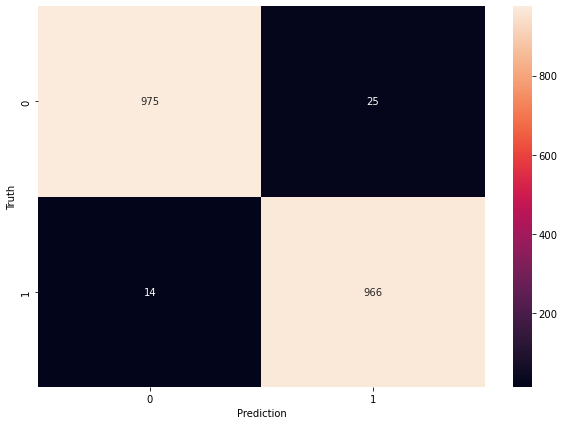

In [29]:
#Confusion Matrix for Model

#finally print the confusion matrix for the best model (GradientBoostingClassifier)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


In [ ]:
## Sample cleaning function
text = "I \t like\ncheese."

nlp = spacy.blank("en")

def make_aligned_doc(raw):
    #XXX replace all whitespace with spaces here
    doc = nlp(raw.replace("\n", " "))
    new2old = {}
    ii = 0 # index in new doc

    for tok in doc:
        if tok.is_space:
            continue
        
        new2old[ii] = tok.idx
        ii += len(tok.text_with_ws)

    text = [tok.text_with_ws for tok in doc if not tok.is_space]
    text = ''.join(text)

    return nlp(text), new2old

doc, alignment = make_aligned_doc(text)
print(doc)
print(alignment)
for (new, old), tok in zip(alignment.items(), doc):
    print(text[old:old+len(tok.text)])